## Experiment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
results_df=pd.read_csv('results.csv')
results_df

,status,train_acc,train_cost,test_acc,test_cost,step
0,new,0.0,0.782574,0.60,0.693806,1
1,new,0.6,0.693235,0.63,0.667948,2
2,new,0.8,0.616679,0.56,0.650120,3
3,new,0.8,0.552706,0.52,0.639208,4
4,new,0.8,0.500498,0.51,0.633642,5
...,...,...,...,...,...,...
4795,fixed_pe,1.0,0.011418,0.97,0.146361,96
4796,fixed_pe,1.0,0.011188,0.97,0.145899,97
4797,fixed_pe,1.0,0.010964,0.97,0.145427,98
4798,fixed_pe,1.0,0.010747,0.97,0.144943,99


In [10]:
df_agg = results_df.groupby(["status", "step"]).agg(["mean", "std"]).reset_index()
df_agg

status step train_acc           train_cost           test_acc            \
                     mean       std       mean       std     mean       std   
0      amp    1     0.475  0.301188   0.719651  0.068656  0.58875  0.147497   
1      amp    2     0.675  0.301188   0.636576  0.053187  0.65500  0.175987   
2      amp    3     0.875  0.103510   0.566790  0.040011  0.58625  0.121765   
3      amp    4     0.850  0.092582   0.509309  0.029197  0.54375  0.059507   
4      amp    5     0.825  0.070711   0.462689  0.021351  0.52750  0.038079   
..     ...  ...       ...       ...        ...       ...      ...       ...   
595    old   96     1.000  0.000000   0.028667  0.002577  0.96000  0.010690   
596    old   97     1.000  0.000000   0.029386  0.004751  0.96125  0.009910   
597    old   98     1.000  0.000000   0.028932  0.003205  0.96000  0.010690   
598    old   99     1.000  0.000000   0.028099  0.002263  0.96000  0.010690   
599    old  100     1.000  0.000000   0.026952  0.003114  0.95875  0.009910   

    test_cost            
         mean       std  
0    0.682231  0.039991  
1    0.659970  0.044580  
2    0.644816  0.048861  
3    0.635295  0.051992  
4    0.629403  0.053493  
..        ...       ...  
595  0.138150  0.007642  
596  0.137333  0.008222  
597  0.135868  0.008115  
598  0.134493  0.008226  
599  0.133497  0.008934  

[600 rows x 10 columns]

['new', 'old', 'amp', 'norm', 'learned_pe', 'fixed_pe']
[0.13923322304617616, 0.10654497891664508, 0.16219146415824073, 0.08200863884121644, 0.1392330538656097, 0.14852012135088444]


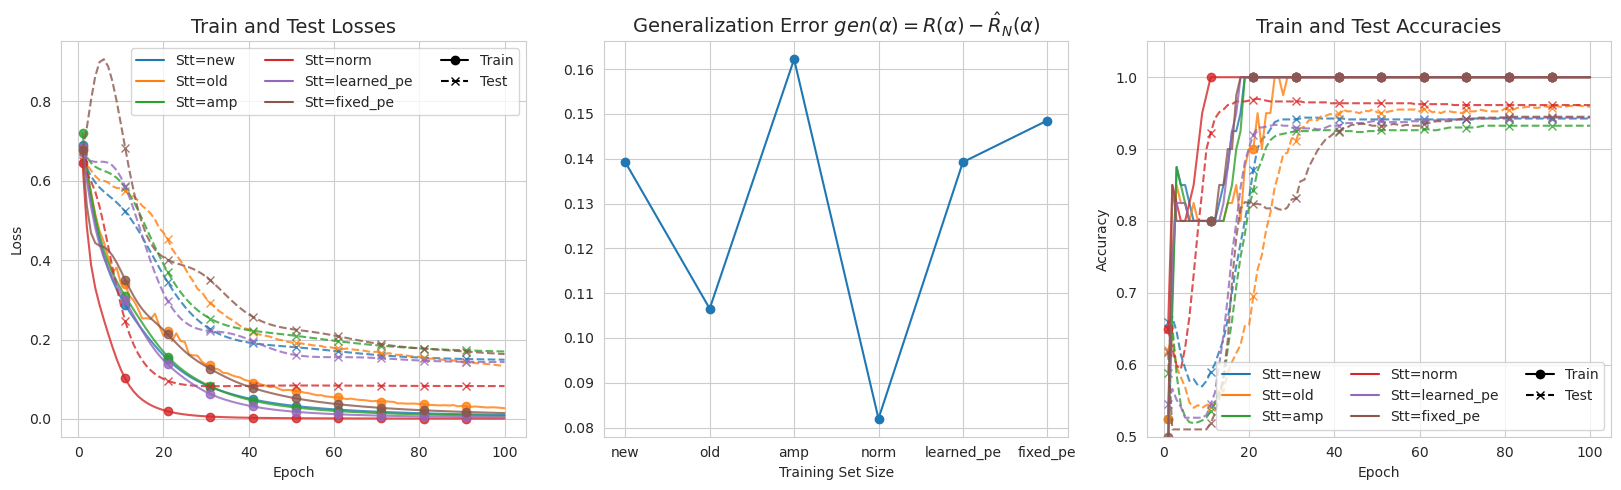

In [11]:
# Plotting
status=['new','old','amp','norm','learned_pe','fixed_pe']
# status=['new','norm']

sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, stt in enumerate(status):
    df = df_agg[df_agg.status == stt]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={stt}$", None, fr"$N={stt}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print(status)
print(generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(status, generalization_errors, "o-", label=r"$gen(\alpha)$")
# axes[1].set_xscale('log')
axes[1].set_xticks(status)
axes[1].set_xticklabels(status)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
# axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'Stt={n}', color=colors[i]) for i, n in enumerate(status)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()